In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline
#%matplotlib

In [2]:
# Definindo cores
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# Função para fontes coloridas

def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [4]:
# Fontes para Arial
plt.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [5]:
# Respostas da pesquisa
X = ['Odeio ele', 'É, dá para o cost', 'OK', 'Interessadx', 'ApaixonadX']
Y = [11, 5, 40, 25, 19] # Respostas para CB antigo.
Z = [12, 6, 14, 30, 38] # Respostas para CB novo.

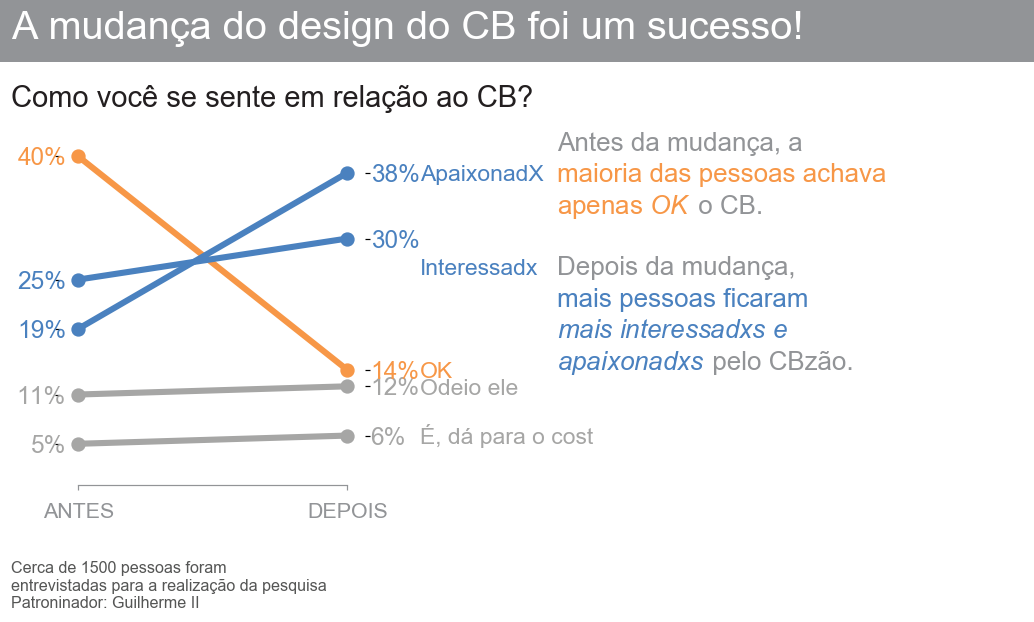

In [22]:
# Criando uma figura nova
fig, ax1 = plt.subplots(figsize=(7.6, 5.5), dpi=110)             

# Ajustando subplot
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

# Matplot não tem slope, então criando dois eixos
ax2 = ax1.twinx()

# Limites dos eixos
ax2.set_ylim([0, 42])
ax1.set_ylim([0, 42])

# Cores para as respostas
C = [GRAY8, GRAY8, ORANGE1, BLUE2, BLUE2]

# Desenhando os círculos e as linhas
for i in range(5):
    
    # Desenhando círculos
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    
    # Desenhando as linhas 
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    
    # Adicionando a legenda
    plt.text(1.27,
             Z[i] + (-1, -4.4)[i == 3],  # shift third label down more
             X[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])

    
# Mudando aparência e propriedades

ax1.tick_params(left='off')
ax2.tick_params(right='off')

plt.setp(ax1,
         xticks=[0, 1],  
         xticklabels=['ANTES', 'DEPOIS'],  
         yticks=Y,  
         yticklabels=[str(v) + '%' for v in Y])  

# Propriedades para o segundo eixo:
plt.setp(ax2,
         yticks=Z,  
         yticklabels=[str(v) + '%' for v in Z])

# Tirando bordas
for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

# Y ticks
for ax, xshift in ((ax1, 0.15), (ax2, -0.05)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        
        # Posicionamento dos eixos
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

# Configurando aparência do X tick
for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    
    # Posicionamento dos eixos
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# Trocando cores do X tick
ax1.tick_params(axis='x', colors=GRAY7)
# Spine bottom
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)

# Título
plt.text(-0.25, 54.3,
         'A mudança do design do CB foi um sucesso!' + ' ' * 20,
         fontsize=26,
         color='white',
         # Caixa retangular para texto
         bbox={'facecolor': GRAY7,  # Cor do fundo
               'pad': 10,  # Espaçamento
               'edgecolor': 'none'})  # Sem bordas

# Pergunta da pesquisa
plt.text(-0.25, 46, 'Como você se sente em relação ao CB?', fontsize=19, 
         color=GRAY1)

# Fonte
plt.text(-0.25, -15,
         'Cerca de 1500 pessoas foram \n'
         'entrevistadas para a realização da pesquisa\n'
         'Patroninador: Guilherme II',
         fontsize=10.5,
         color=GRAY3)

# Nota 1
rainbow_text(1.78, 33,
             'Antes da mudança, a\n'
             'maioria das pessoas achava\n'
             'apenas $\\mathit{OK}$|| o CB.',
             [[GRAY7], [ORANGE1], [ORANGE1, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)

# Nota 2
rainbow_text(1.78, 14,
             'Depois da mudança,\n'
             'mais pessoas ficaram\n'
             '$\\it{mais \ interessadxs \ e}$\n'
             '$\\it{apaixonadxs}$|| pelo CBzão.',
             [[GRAY7], [BLUE2], [BLUE2], [BLUE2, GRAY7]],
             spacing=31.5,
             ax=ax1,
             fontsize=17)